In [4]:
import scipy.stats as sts 
import matplotlib.pyplot as plt
import numpy as np

# MAXWELL
Рассматриваем ЦПТ на примере распределения Максвела

Построим график функции плотности распределения (PDF) и гистограмму для выборки n = 1000  
Также рассчитаем теоретическое среднее и дисперсию, необходимые для определения параметров нормальных распределений, которыми будем приближать распределение выборочных средних при различном числе n.

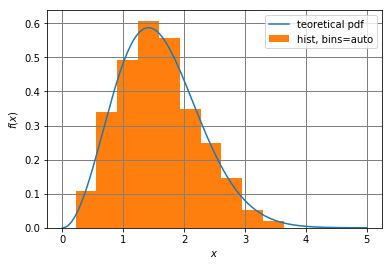

expect value (теоретическое среднее) =  1.59576912161
variant(дисперсия) =  0.45352091053


In [84]:
maxwell_distr = sts.maxwell()
sample = maxwell_distr.rvs(1000)

x = np.linspace(0, 5,1000)
pdf = maxwell_distr.pdf(x)
plt.plot(x, pdf, label='teoretical pdf')
plt.grid(color='tab:gray', linestyle='-', linewidth=1)

plt.hist(sample, normed=True, label='hist, bins=auto')
plt.ylabel('$f(x)$')
plt.legend()
plt.xlabel('$x$')

plt.show()
maxwell_var = maxwell_distr.var()
maxwell_expect = maxwell_distr.expect()
print 'expect value (теоретическое среднее) = ', maxwell_expect
print 'variant(дисперсия) = ', maxwell_var

# Функция оценки выборочных средних при различных n

In [82]:
# Функция будет проводить оценку распределения выборочного среднего при разном числе испытаний (Nf) 
def func (Nf):
    import scipy.stats as sts 
    import matplotlib.pyplot as plt
    import math 
    maxwell_distr = sts.maxwell()
    x = np.linspace(0, 5,1000)
    N = np.arange(1,1001)
    # получим теоретическое среднеее и дисперсию
    maxwell_var = maxwell_distr.var()
    maxwell_expect = maxwell_distr.expect()
    # определим плотность  нормального распределения для полученного на вход числа испытаний (Nf) 
    norm_rv_Nf = sts.norm(maxwell_expect, math.sqrt(maxwell_var/Nf))
    # Отобразим график
    plt.plot(x, norm_rv_Nf.pdf(x), label='Pdf for n='+str(Nf))
    
    # Рассчитаем выборочные средние Nраз. Для каждого Nраза считаем выборочное среднее из Nf-испытаний
    yn = [maxwell_distr.rvs(Nf).sum()/Nf for z in N]
    
    # Отобразим гистограмму полученных выборочных средних
    plt.hist(yn, normed=True, label='hist for n='+str(Nf))
    plt.grid(color='tab:gray', linestyle='-', linewidth=1)
    
    plt.ylabel('(f(x)')
    plt.legend()
    plt.xlabel('$x$')
    plt.show()

# Распределение выборочного среднего при n=5

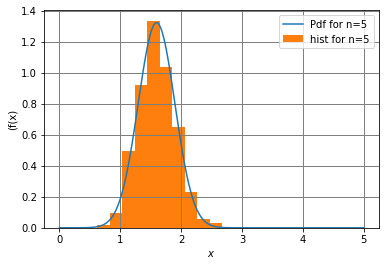

In [83]:
func(5)

# Распределение выборочного среднего при n=10

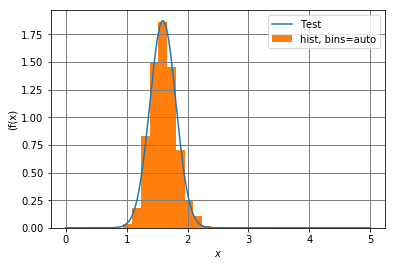

In [75]:
func(10)

# Распределение выборочного среднего при n=50

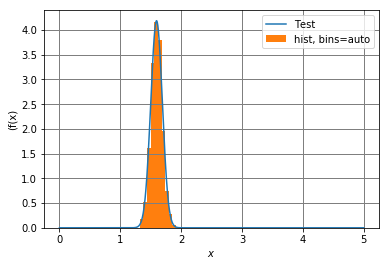

In [76]:
func(50)

# Выводы
При увеличении числа испытаний точность апроксимации выборочных средних к теоретическому среднему возрастает.
Гистограммы испытаний становятся более узкими.
